# **Linear Regression**

# Linear Regression

Linear regression is a fundamental supervised learning algorithm used to predict a continuous target variable ($y$) based on one or more independent features ($X$).


### 1. Hypothesis Function
For simple linear regression (one feature):
$$y = \beta_0 + \beta_1x$$
For multiple linear regression:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$
Where:
- $\beta_0$ is the intercept (bias).
- $\beta_1, ..., \beta_n$ are the coefficients (weights).

### 2. Cost Function (Mean Squared Error)
To measure the accuracy of our model, we use the Mean Squared Error (MSE):
$$J(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_{pred} - y_{actual})^2$$

### 3. Optimization (Gradient Descent)
The goal is to minimize the cost function $J(\beta)$ by iteratively updating the weights:
$$\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta)$$
Where $\alpha$ is the learning rate.

### 4. Key Assumptions
- **Linearity**: Relationship between $X$ and $y$ is linear.
- **Independence**: Observations are independent of each other.
- **Homoscedasticity**: Constant variance of error terms.
- **Normality**: Errors are normally distributed.


There are 3 types of linear regression : 
- Simple Linear Regression
    - two features: 1 for input and another for target/output
- Multiple Linear Regression
    - multiple input features and one target feature
- Polynomial Linear Regression

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('placement (1).csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


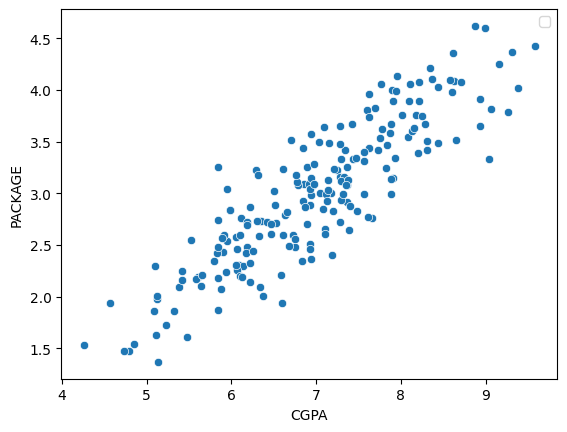

In [3]:
sns.scatterplot(x=df['cgpa'], y=df['package'])
plt.legend()
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')
plt.show()

# as you can see down below that there is a linear relationship btwn both features

In [4]:
X = df.iloc[:, :1]
y = df.iloc[:, -1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()

lr.fit(X_train, y_train)


lr.predict(X_test.iloc[0].values.reshape(1,1))      # since the data is in 1D, we have to reshape it to (1, 1)


array([3.89111601])

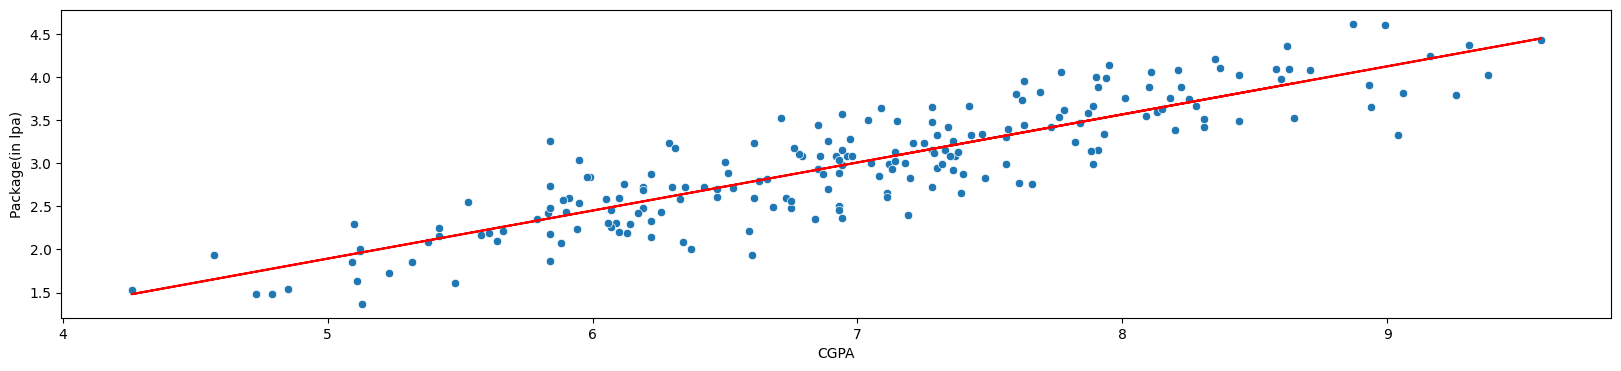

In [5]:
plt.figure(figsize=(20,4))

sns.scatterplot(x=df['cgpa'],y=df['package'])

plt.plot(X_train, lr.predict(X_train), color='r')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

plt.show()

In [6]:
m = lr.coef_
b = lr.intercept_

print(m)
print(b)

# y = mx + b
# package = m * cgpa + b
print()
print(m * 8.58 + b )   # in place of x enter any cgpa value and you will get the ans
print(m * 9.5 + b )

[0.55795197]
-0.8961119222429144

[3.89111601]
[4.40443183]


### Model Parameters Interpretation

1. **Coefficient (m):** Represents the **Slope** of the linear regression line. It indicates the change in the target variable (`package`) for a one-unit increase in the feature (`cgpa`).
  - Value: ~0.56. This means for every 1 point increase in CGPA, the package increases by approximately 0.56 LPA.
  - $$ m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$

*   **1 Feature:** We divide the covariance by the variance:
    $$ m = \frac{\text{cov}(x,y)}{\text{var}(x)} $$
*   **Multiple Features:** We multiply the covariance matrix by the inverse of the variance matrix (roughly speaking):
    $$ \beta = (\text{Variance})^{-1} \cdot (\text{Covariance}) $$

The formula is:
    $$ \beta = (X^T X)^{-1} X^T y $$

  **Where:**
  *   **$\beta$ (Beta)**: A vector containing all your coefficients: $[b, m_1, m_2, \dots, m_n]$.
  *   **$X$**: The **Design Matrix**. This contains all your data points.
      *   *Note:* We usually add a column of **1s** to this matrix to handle the intercept ($b$).
  *   **$y$**: The vector of actual target values.
  *   **$X^T$**: The **Transpose** of matrix $X$ (rows become columns).
  *   **$^{-1}$**: The **Inverse** of the matrix.


2. **Intercept (b):** Represents the **Y-intercept**. It indicates the theoretical starting value of the target variable (`package`) when the feature (`cgpa`) is 0.
  - Value: ~-0.90. 
  - **Intercept** is the starting point of our prediction line. It tells us what the predicted package would be if the CGPA was zero. While a CGPA of 0 might not happen in real life, the intercept is mathematically necessary to anchor the line in the right place so that the rest of the predictions are accurate
  - $$ b = \bar{y} - m\bar{x} $$
  
    - $\bar{y}$ is the mean of the target variable
    - $\bar{x}$ is the mean of the feature variable
    - $m$ is the slope of the line
    - $m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$
  

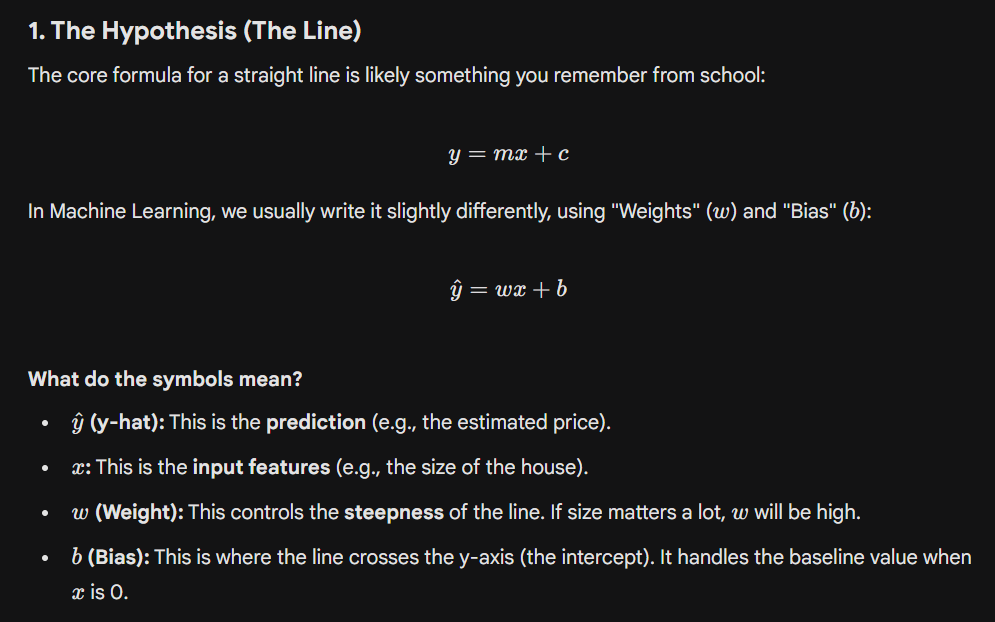
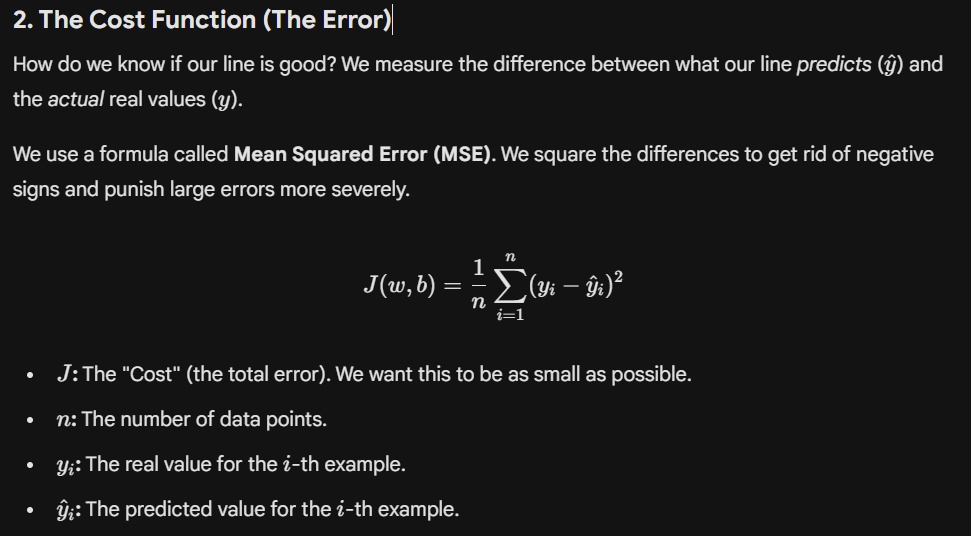
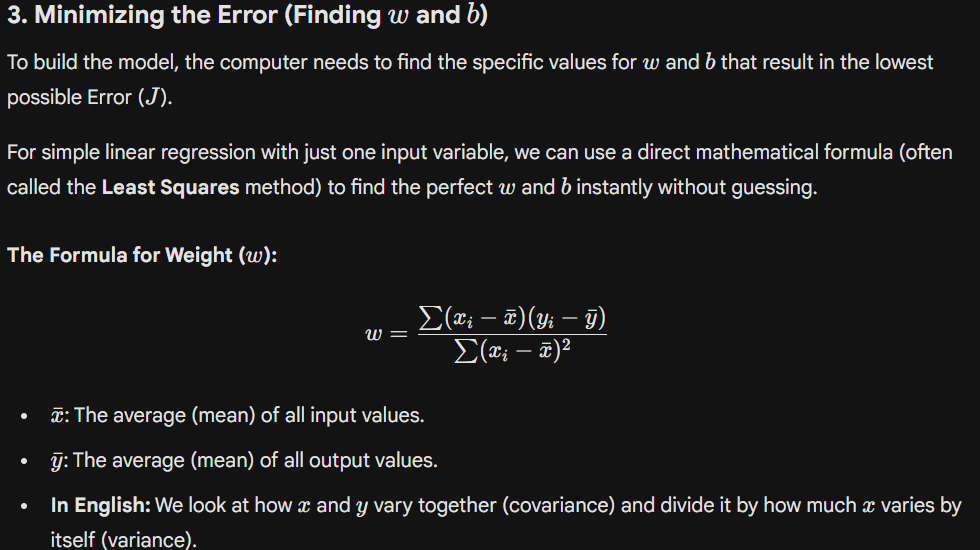
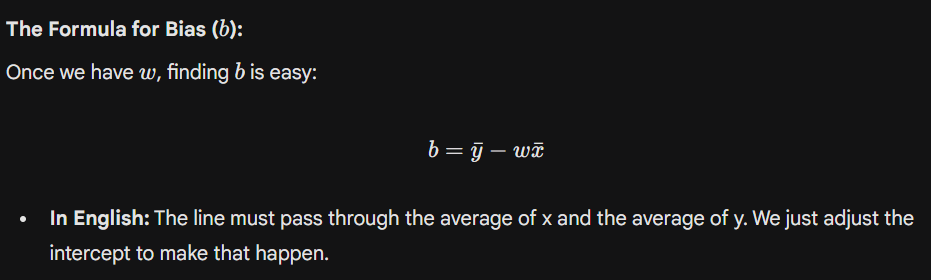
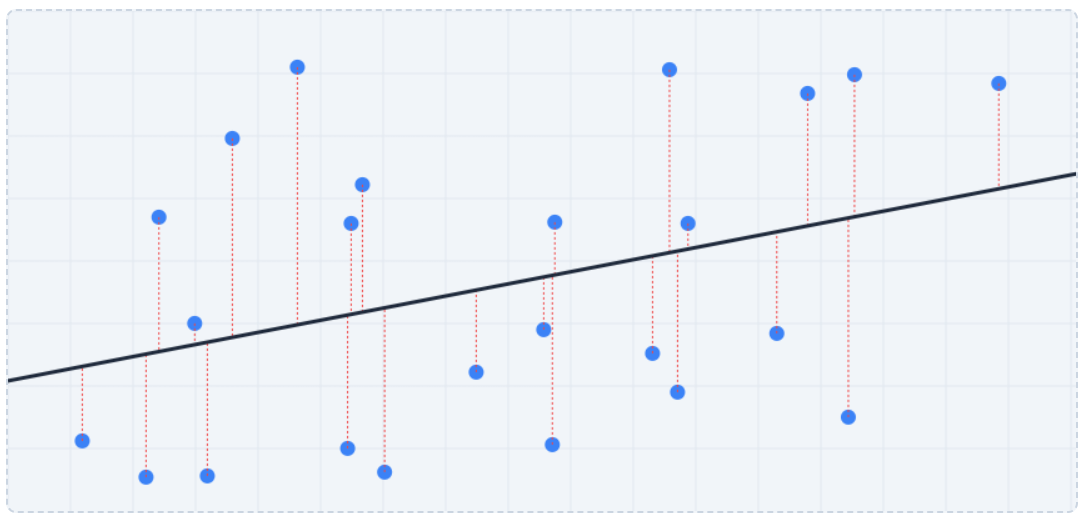

## **How to find m and b**

There are two ways to find m and b:

1. Closed form solution
    - finding values through foumula
    - techniques used : **OLS (Ordinary Least Squares)**
    - pros : good for lower dimension datasets
    - cons : using formula is not practical for larger dimension datasets, in such cases we use gradient descent is used
2. Non-closed form solution
    - finding values through approximation
    - techniques used : **Gradient Descent, SGD Regressor**
    - pros : using formula is not practical for larger dimension datasets, in such cases we use gradient descent is used

### **FOR BETTER EXPLANATION GO TO '0 visualizers' and check for 'linear_regression_visualizer'**

# 🔢 Normal Equation Example with Numbers
### 1. The Setup
We have our Input Matrix $X$ (adding a column of 1s for the intercept) and Target Vector $y$.
$$
X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}, \quad
y = \begin{bmatrix} 3 \\ 5 \\ 7 \end{bmatrix}
$$
### 2. Compute $X^T X$ (The "Variance" Part)
First, multiply the Transpose of X by itself.
$$
X^T = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & 3 \end{bmatrix}
$$
$$
X^T X = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & 3 \end{bmatrix} \cdot \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}
$$
*   Row 1 • Col 1: $1\cdot1 + 1\cdot1 + 1\cdot1 = 3$
*   Row 1 • Col 2: $1\cdot1 + 1\cdot2 + 1\cdot3 = 6$
*   Row 2 • Col 1: $1\cdot1 + 2\cdot1 + 3\cdot1 = 6$
*   Row 2 • Col 2: $1\cdot1 + 2\cdot2 + 3\cdot3 = 14$
$$
X^T X = \begin{bmatrix} 3 & 6 \\ 6 & 14 \end{bmatrix}
$$
### 3. Compute $(X^T X)^{-1}$ (The Inverse)
Now we find the inverse of that $2 \times 2$ matrix.
*   Determinant ($ad - bc$): $(3 \cdot 14) - (6 \cdot 6) = 42 - 36 = 6$
*   Swap $a$ & $d$, flip signs of $b$ & $c$, divide by determinant:
$$
(X^T X)^{-1} = \frac{1}{6} \begin{bmatrix} 14 & -6 \\ -6 & 3 \end{bmatrix} = \begin{bmatrix} 2.33 & -1 \\ -1 & 0.5 \end{bmatrix}
$$

That $-1$ is the result of multiplying the fraction $\frac{1}{6}$ by the number $-6$ inside the matrix.

When you have a number outside a matrix (a scalar), you multiply it by every single number inside.

Here is the breakdown for that specific spot:

$$ \frac{1}{6} \times -6 = \frac{-6}{6} = \mathbf{-1} $$

Visualizing the whole matrix math:
$$ \frac{1}{6} \begin{bmatrix} 14 & \mathbf{-6} \ \mathbf{-6} & 3 \end{bmatrix}
\begin{bmatrix} (14 \div 6) & (\mathbf{-6} \div \mathbf{6}) \ (\mathbf{-6} \div \mathbf{6}) & (3 \div 6) \end{bmatrix}
\begin{bmatrix} 2.33 & \mathbf{-1} \ \mathbf{-1} & 0.5 \end{bmatrix} $$

### 4. Compute $X^T y$ (The "Covariance" Part)
Multiply Transpose of X by the target y.
$$
X^T y = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & 3 \end{bmatrix} \cdot \begin{bmatrix} 3 \\ 5 \\ 7 \end{bmatrix}
$$
*   Row 1: $1\cdot3 + 1\cdot5 + 1\cdot7 = 15$
*   Row 2: $1\cdot3 + 2\cdot5 + 3\cdot7 = 3 + 10 + 21 = 34$
$$
X^T y = \begin{bmatrix} 15 \\ 34 \end{bmatrix}
$$
### 5. Final Step: Multiply Inverse by $X^T y$
$$ \beta = (X^T X)^{-1} X^T y $$
$$
\beta = \frac{1}{6} \begin{bmatrix} 14 & -6 \\ -6 & 3 \end{bmatrix} \cdot \begin{bmatrix} 15 \\ 34 \end{bmatrix}
$$
*   Row 1: $14\cdot15 + (-6)\cdot34 = 210 - 204 = 6$
*   Row 2: $-6\cdot15 + 3\cdot34 = -90 + 102 = 12$
$$
\beta = \frac{1}{6} \begin{bmatrix} 6 \\ 12 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}
$$
### 🎉 Result
We found $\beta = [1, 2]$.
*   **Intercept ($\beta_0$) = 1**
*   **Slope ($\beta_1$) = 2**
This matches our equation exactly: **$y = 1 + 2x$**.

$$ \frac{1}{6} \begin{bmatrix} 6 \ 12 \end{bmatrix} $$

Top Number: Multiply $\frac{1}{6}$ by $6$: $$ \frac{1}{6} \times 6 = \frac{6}{6} = \mathbf{1} $$

Bottom Number: Multiply $\frac{1}{6}$ by $12$: $$ \frac{1}{6} \times 12 = \frac{12}{6} = \mathbf{2} $$

Result: $$ \begin{bmatrix} 1 \ 2 \end{bmatrix} $$

# 🔢 Multiple Regression 3x3 Matrix Calculation
### 1. The Setup
We have 3 samples.
*   **Sample 1:** Intercept=1, $x_1=1$, $x_2=0 \Rightarrow y=3$
*   **Sample 2:** Intercept=1, $x_1=0$, $x_2=1 \Rightarrow y=4$
*   **Sample 3:** Intercept=1, $x_1=1$, $x_2=1 \Rightarrow y=6$
$$
X = \begin{bmatrix} 1 & 1 & 0 \\ 1 & 0 & 1 \\ 1 & 1 & 1 \end{bmatrix}, \quad
y = \begin{bmatrix} 3 \\ 4 \\ 6 \end{bmatrix}
$$
### 2. Compute $X^T X$
Multiply Transpose of X by X.
$$
X^T = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix}
$$
$$
X^T X = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix} \cdot \begin{bmatrix} 1 & 1 & 0 \\ 1 & 0 & 1 \\ 1 & 1 & 1 \end{bmatrix}
$$
*   Resulting Matrix (summing dot products of rows and cols):
$$
X^T X = \begin{bmatrix} 3 & 2 & 2 \\ 2 & 2 & 1 \\ 2 & 1 & 2 \end{bmatrix}
$$
### 3. The Inverse $(X^T X)^{-1}$
We need the inverse of that $3 \times 3$ matrix.
*(The determinant is $1$, which makes the math nice and clean).*
$$
(X^T X)^{-1} = \begin{bmatrix} 3 & -2 & -2 \\ -2 & 2 & 1 \\ -2 & 1 & 2 \end{bmatrix}
$$
*Check: If you multiply this matrix by the original $X^T X$, you get the Identity matrix ($1$s on diagonal).*

Here is the step-by-step mathematical process of how those negative numbers appeared (specifically, how we multiply by -1).

The process of finding an inverse has a specific step called "Finding the Cofactors". This is where the -1 multiplication happens.

The Rule: "The Checkerboard of Signs"
Every position in a matrix has a hidden sign attached to it based on its location.

If (Row# + Col#) is Even, the sign is Positive (+1).
If (Row# + Col#) is Odd, the sign is Negative (-1).
$$ \text{Sign Pattern} = \begin{bmatrix}

& \mathbf{-} & + \ \mathbf{-} & + & \mathbf{-} \
& \mathbf{-} & + \end{bmatrix} $$

### 4. Compute $X^T y$
Multiply Transpose of X by the target vector $y$.
$$
X^T y = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix} \cdot \begin{bmatrix} 3 \\ 4 \\ 6 \end{bmatrix}
$$
*   Row 1: $1\cdot3 + 1\cdot4 + 1\cdot6 = 13$
*   Row 2: $1\cdot3 + 0\cdot4 + 1\cdot6 = 9$
*   Row 3: $0\cdot3 + 1\cdot4 + 1\cdot6 = 10$
$$
X^T y = \begin{bmatrix} 13 \\ 9 \\ 10 \end{bmatrix}
$$
### 5. Final Step: Multiply Inverse by $X^T y$
$$ \beta = (X^T X)^{-1} X^T y $$
$$
\beta = \begin{bmatrix} 3 & -2 & -2 \\ -2 & 2 & 1 \\ -2 & 1 & 2 \end{bmatrix} \cdot \begin{bmatrix} 13 \\ 9 \\ 10 \end{bmatrix}
$$
*   $\beta_0$: $3(13) + (-2)(9) + (-2)(10) = 39 - 18 - 20 = \mathbf{1}$
*   $\beta_1$: $-2(13) + 2(9) + 1(10) = -26 + 18 + 10 = \mathbf{2}$
*   $\beta_2$: $-2(13) + 1(9) + 2(10) = -26 + 9 + 20 = \mathbf{3}$
$$
\beta = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}
$$
### 🎉 Result
The math works perfectly! We recovered our hidden parameters:
1.  **Intercept = 1**
2.  **Coefficient for $x_1$ = 2**
3.  **Coefficient for $x_2$ = 3**